In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('fivethirtyeight')

In [10]:
df=pd.read_csv('/content/collegePlace.csv')
df.tail()


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


<Axes: xlabel='Hostel', ylabel='Density'>

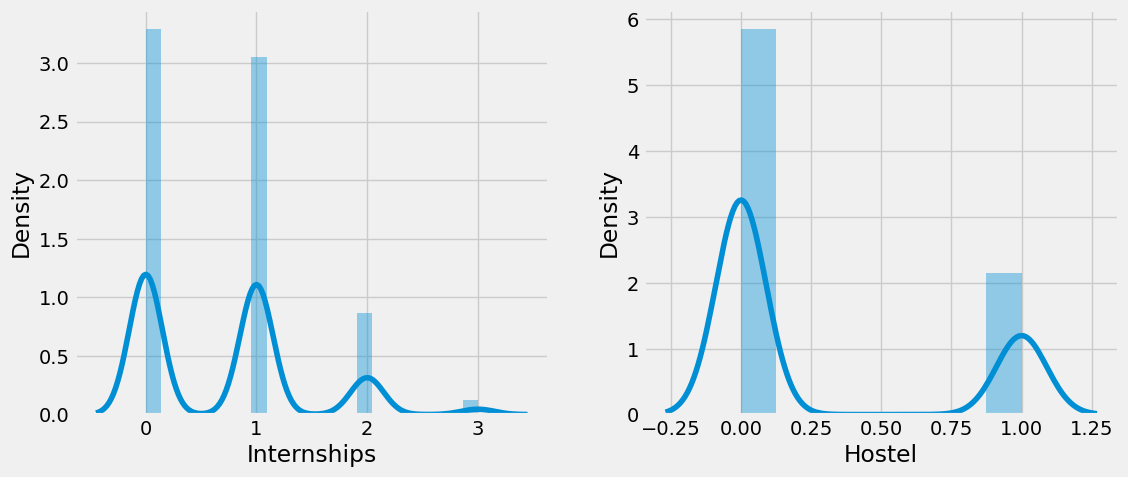

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['Internships'])
plt.subplot(122)
sns.distplot(df['Hostel'])

In [13]:
 # creating dummy dataframe for categorical values

df_cat = df.select_dtypes(include='int64')
df_cat.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1,1
1,21,0,7,1,1,1
2,22,1,6,0,0,1
3,21,0,8,0,1,1
4,22,0,8,1,0,1


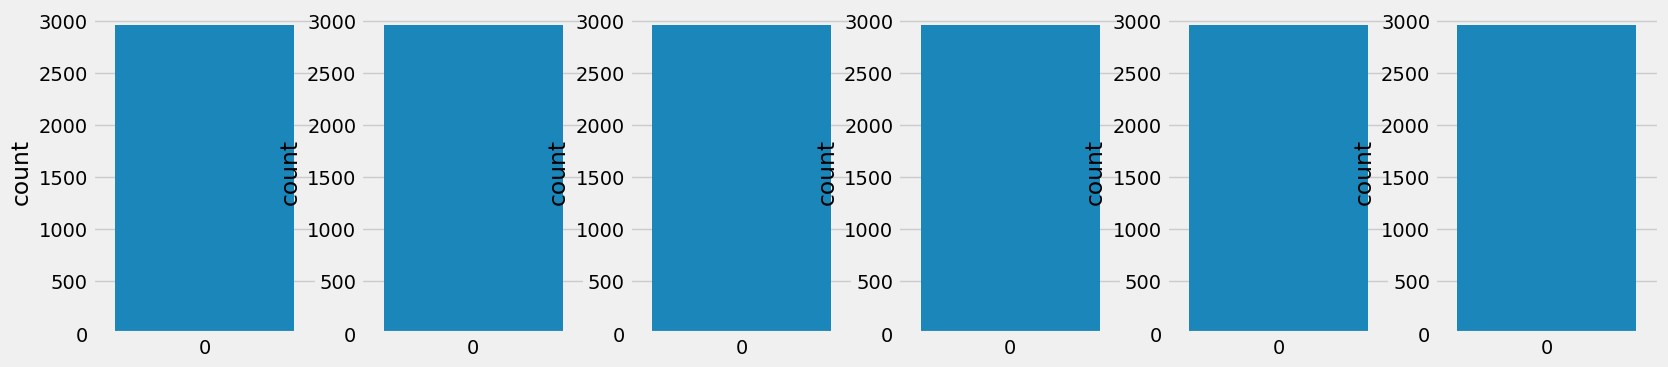

In [14]:
# visualizing counts in each variable
plt.figure(figsize=(18,4))
for i,j in enumerate(df_cat):
  plt.subplot(1,6,i+1)
  sns.countplot(df[j])

<Axes: xlabel='PlacedOrNot', ylabel='count'>

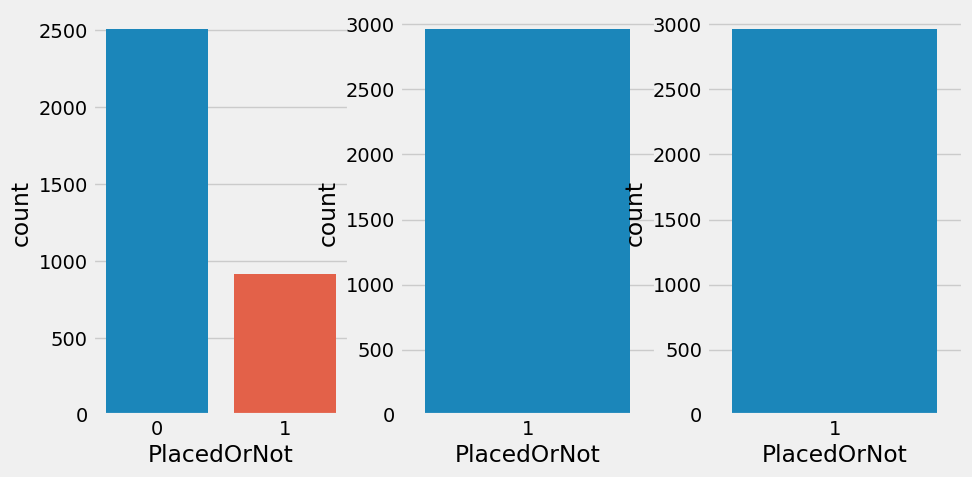

In [15]:
# Bivarite analysis - Extracting info from a double column

# Visualizing the relation between Age,Internships,Hostel,cgpa,HistoryOfBacklogs & PlacedOrNot

plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(df['PlacedOrNot'],x=df['Age'])
plt.subplot(132)
sns.countplot(df['PlacedOrNot'],x=df['Internships'])
plt.subplot(133)
sns.countplot(df['PlacedOrNot'],x=df['Hostel'])
plt.subplot(131)
sns.countplot(df['PlacedOrNot'],x=df['CGPA'])
plt.subplot(132)
sns.countplot(df['PlacedOrNot'],x=df['HistoryOfBacklogs'])

In [16]:
# creating new column

df['Age_'] = ['15-30' if x<=30 else "30-50" if x>30 and x<=50 else '50+' for x in df['Age']]


In [17]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Age_
0,22,Male,Electronics And Communication,1,8,1,1,1,15-30
1,21,Female,Computer Science,0,7,1,1,1,15-30
2,22,Female,Information Technology,1,6,0,0,1,15-30
3,21,Male,Information Technology,0,8,0,1,1,15-30
4,22,Male,Mechanical,0,8,1,0,1,15-30


<Axes: >

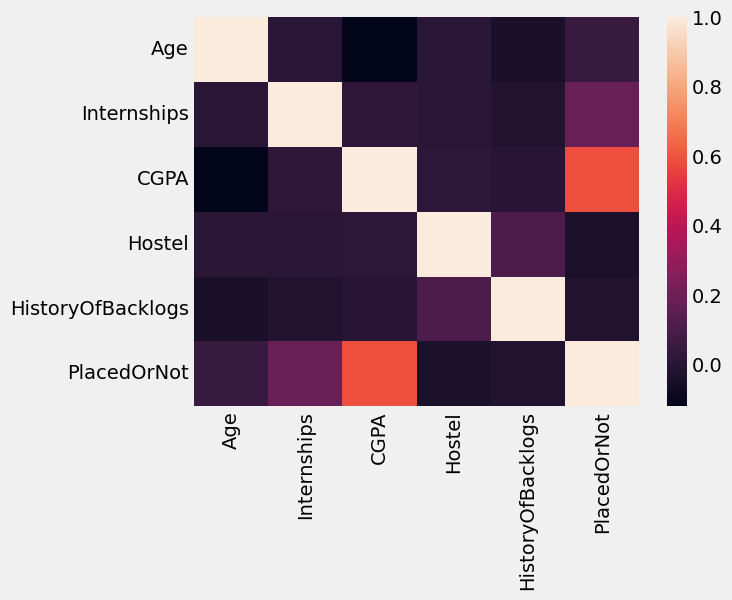

In [18]:
# Multivariate analysis - Extra info from more than 2 columns

# Finding corr()
sns.heatmap(df.corr())




*   List item
*   List item



In [19]:
# Descritive analysis _ descriptive stat 

In [20]:
df.describe(include='all')

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Age_
count,2966.000000,2966,2966,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966
unique,NaN,2,6,NaN,NaN,NaN,NaN,NaN,1
top,NaN,Male,Computer Science,NaN,NaN,NaN,NaN,NaN,15-30
freq,NaN,2475,776,NaN,NaN,NaN,NaN,NaN,2966
mean,21.485840,NaN,NaN,0.703641,7.073837,0.269049,0.192178,0.552596,NaN
std,1.324933,NaN,NaN,0.740197,0.967748,0.443540,0.394079,0.497310,NaN
min,19.000000,NaN,NaN,0.000000,5.000000,0.000000,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,0.000000,6.000000,0.000000,0.000000,0.000000,NaN
50%,21.000000,NaN,NaN,1.000000,7.000000,0.000000,0.000000,1.000000,NaN
75%,22.000000,NaN,NaN,1.000000,8.000000,1.000000,0.000000,1.000000,NaN


In [21]:
# Data preprocessing

In [22]:
# Finding the shape of data

In [23]:
df.shape

(2966, 9)

In [24]:
# Finding null values

In [25]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
Age_                 0
dtype: int64

In [ ]:
# Finding dtype

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
 8   Age_               2966 non-null   object
dtypes: int64(6), object(3)
memory usage: 208.7+ KB


In [27]:
# Finding outliers

<Axes: >

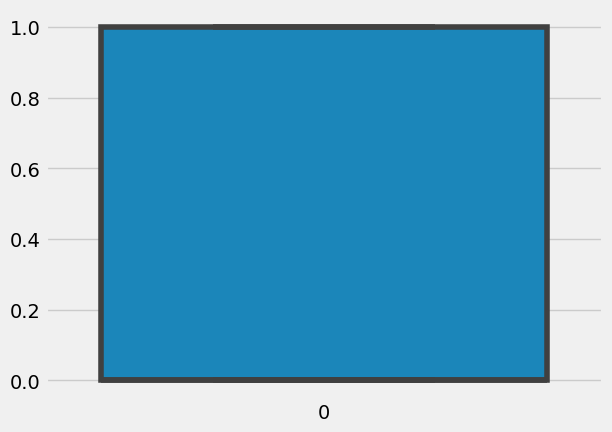

In [28]:
sns.boxplot(df['Hostel'])

In [29]:
# Finding the count of outliers

In [30]:
# IOR = q3-q1....., ub = q3+(1.5*IOR), 1b = q1-(1.5*IOR)

In [31]:
q1 = np.quantile(df['Hostel'],0.25)

In [32]:
q3 = np.quantile(df['Hostel'],0.25)

In [33]:
from seaborn.distributions import disport distplot

SyntaxError: ignored

In [34]:
# Handling outliers

In [35]:
from scipy import stats

In [36]:
plt.figure(figsize=(15,4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Axes: >

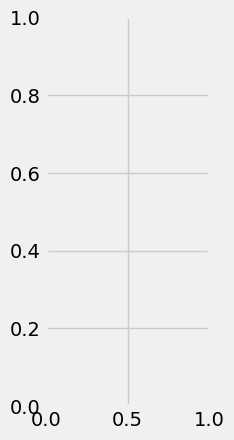

In [37]:
plt.subplot(131)

In [38]:
sns,distplot(df['Hostel'])

NameError: ignored

<Axes: >

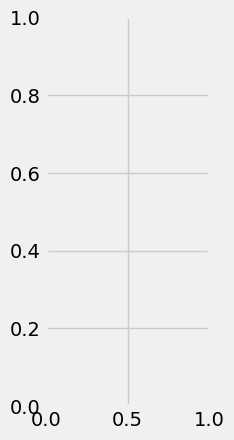

In [39]:
plt.subplot(132)

((array([-3.49880933, -3.25488447, -3.11998364, ...,  3.11998364,
          3.25488447,  3.49880933]),
  array([-inf, -inf, -inf, ...,   0.,   0.,   0.])),
 (nan, nan, nan))

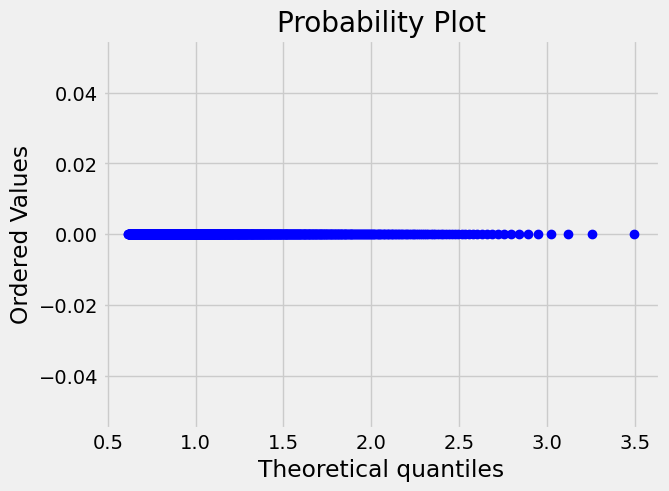

In [40]:
stats.probplot(np.log(df['Hostel']),plot=plt)

In [41]:
# Transforming normal values to log values

In [42]:
df['Hostel']=np.log(df['Hostel'])

In [43]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Age_
0,22,Male,Electronics And Communication,1,8,0.0,1,1,15-30
1,21,Female,Computer Science,0,7,0.0,1,1,15-30
2,22,Female,Information Technology,1,6,-inf,0,1,15-30
3,21,Male,Information Technology,0,8,-inf,1,1,15-30
4,22,Male,Mechanical,0,8,0.0,0,1,15-30


In [44]:
# Encoding

In [45]:
df['HistoryOfBacklogs'] = [ 0 if x=='LOW' else 1 if x=='NORMAL' else 2 for x in df['HistoryOfBacklogs']]

In [46]:
df['Gender'] = df['Gender'].replace({'f':0, 'M':1})

In [47]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Age_
0,22,Male,Electronics And Communication,1,8,0.0,2,1,15-30
1,21,Female,Computer Science,0,7,0.0,2,1,15-30
2,22,Female,Information Technology,1,6,-inf,2,1,15-30
3,21,Male,Information Technology,0,8,-inf,2,1,15-30
4,22,Male,Mechanical,0,8,0.0,2,1,15-30


In [48]:
# Spoliting deep & Indep variables

In [49]:
X = df.drop('PlacedOrNot',axis=1)

In [50]:
X.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,Age_
0,22,Male,Electronics And Communication,1,8,0.0,2,15-30
1,21,Female,Computer Science,0,7,0.0,2,15-30
2,22,Female,Information Technology,1,6,-inf,2,15-30
3,21,Male,Information Technology,0,8,-inf,2,15-30
4,22,Male,Mechanical,0,8,0.0,2,15-30


In [51]:
# simple linear reg

In [52]:
# Import necessary lib

In [53]:
import numpy as np

In [54]:
import pandas as pd

In [55]:
3 Reading the data

SyntaxError: ignored

In [56]:
df = pd.read_csv('/content/college.csv')

FileNotFoundError: ignored

In [57]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Age_
0,22,Male,Electronics And Communication,1,8,0.0,2,1,15-30
1,21,Female,Computer Science,0,7,0.0,2,1,15-30
2,22,Female,Information Technology,1,6,-inf,2,1,15-30
3,21,Male,Information Technology,0,8,-inf,2,1,15-30
4,22,Male,Mechanical,0,8,0.0,2,1,15-30


In [58]:
# checking the datatype

In [59]:
df.info

<bound method DataFrame.info of       Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8     0.0   
1      21  Female               Computer Science            0     7     0.0   
2      22  Female         Information Technology            1     6    -inf   
3      21    Male         Information Technology            0     8    -inf   
4      22    Male                     Mechanical            0     8     0.0   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7    -inf   
2962   23    Male                     Mechanical            1     7     0.0   
2963   22    Male         Information Technology            1     7    -inf   
2964   22    Male               Computer Science            1     7    -inf   
2965   23    Male                          Civil            0     8    -inf   

      HistoryOfBack

In [60]:
# Descriptive stat

In [61]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.0,2966.0,2966.000000
mean,21.485840,0.703641,7.073837,-inf,2.0,0.552596
std,1.324933,0.740197,0.967748,NaN,0.0,0.497310
min,19.000000,0.000000,5.000000,-inf,2.0,0.000000
25%,21.000000,0.000000,6.000000,NaN,2.0,0.000000
50%,21.000000,1.000000,7.000000,NaN,2.0,1.000000
75%,22.000000,1.000000,8.000000,0.0,2.0,1.000000
max,30.000000,3.000000,9.000000,0.0,2.0,1.000000


In [62]:
# Checking null values

In [63]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
Age_                 0
dtype: int64

In [64]:
# visualizing data points

In [65]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(df['HistoryOfBacklogs'],df['CGPA'])

In [66]:
# independent variable

In [67]:
X = df.iloc[:,0:1]

In [68]:
X.head()

,Age
0,22
1,21
2,22
3,21
4,22


In [69]:
# Dependent Variable

In [70]:
Y = df.iloc[:, 1 :]

In [71]:
Y.head()

,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Age_
0,Male,Electronics And Communication,1,8,0.0,2,1,15-30
1,Female,Computer Science,0,7,0.0,2,1,15-30
2,Female,Information Technology,1,6,-inf,2,1,15-30
3,Male,Information Technology,0,8,-inf,2,1,15-30
4,Male,Mechanical,0,8,0.0,2,1,15-30


In [72]:
# Split training & testing

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Checking unique values

In [ ]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [75]:
# Converting object datatype to int

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
df['Stream'] = le.fit_transform(df['stream'])

NameError: ignored

In [78]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Age_
0,22,Male,Electronics And Communication,1,8,0.0,2,1,15-30
1,21,Female,Computer Science,0,7,0.0,2,1,15-30
2,22,Female,Information Technology,1,6,-inf,2,1,15-30
3,21,Male,Information Technology,0,8,-inf,2,1,15-30
4,22,Male,Mechanical,0,8,0.0,2,1,15-30


In [79]:
# Independent variables

In [80]:
X = df.iloc[:,0:7]

In [81]:
X.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,Male,Electronics And Communication,1,8,0.0,2
1,21,Female,Computer Science,0,7,0.0,2
2,22,Female,Information Technology,1,6,-inf,2
3,21,Male,Information Technology,0,8,-inf,2
4,22,Male,Mechanical,0,8,0.0,2


In [84]:
y = df.iloc[:,6:]

In [85]:
y.head()

,HistoryOfBacklogs,PlacedOrNot,Age_
0,2,1,15-30
1,2,1,15-30
2,2,1,15-30
3,2,1,15-30
4,2,1,15-30


In [90]:
# finding co_relation

df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,NaN,NaN,0.046943
Internships,0.006552,1.000000,0.023496,NaN,NaN,0.179334
CGPA,-0.119787,0.023496,1.000000,NaN,NaN,0.588648
Hostel,NaN,NaN,NaN,NaN,NaN,NaN
HistoryOfBacklogs,NaN,NaN,NaN,NaN,NaN,NaN
PlacedOrNot,0.046943,0.179334,0.588648,NaN,NaN,1.000000


In [91]:
# Spliting In-dependent variable
x = df.iloc[:,0:8]
x.head()  

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,0.0,2,1
1,21,Female,Computer Science,0,7,0.0,2,1
2,22,Female,Information Technology,1,6,-inf,2,1
3,21,Male,Information Technology,0,8,-inf,2,1
4,22,Male,Mechanical,0,8,0.0,2,1


In [93]:
y = df.iloc[:,7:]
y.head()

,PlacedOrNot,Age_
0,1,15-30
1,1,15-30
2,1,15-30
3,1,15-30
4,1,15-30
